In [1]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing

1. Найти данные для кластеризации. Данные в группе не должны повторяться. Если признаки в данных имеют очень сильно разные масштабы, то необходимо данные предварительно нормализовать.


In [2]:
df = pd.read_csv("data/WHR_2023.csv")

df = df.drop(["country", "region"], axis=1)
graphCols = ["happiness_score", "gdp_per_capita", "social_support", "healthy_life_expectancy",
             "freedom_to_make_life_choices", "generosity", "perceptions_of_corruption"]
df = df.apply(lambda x: (x - x.mean()) / x.std(), axis=0)
df = df[graphCols]
df = df.dropna(axis=0)
df.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
count,136.000000,136.000000,136.000000,1.360000e+02,136.000000,136.000000,136.000000
mean,0.004075,0.004466,-0.003443,2.089832e-16,0.006099,0.008070,0.004578
std,1.002554,1.002324,1.002882,1.000000e+00,1.001136,0.999209,1.002255
min,-3.228970,-3.249669,-3.543156,-2.336932e+00,-3.612008,-1.952237,-1.151313
25%,-0.734516,-0.714231,-0.602048,-7.510093e-01,-0.543473,-0.657096,-0.679812
50%,0.134837,0.102814,0.212331,1.488504e-01,0.117056,-0.144299,-0.267495
75%,0.704171,0.903114,0.750908,7.742847e-01,0.780930,0.667629,0.334211
max,1.986268,1.831600,1.421258,2.143220e+00,1.551826,3.596489,3.275667


2. Провести кластеризацию данных с помощью алгоритма k-means. Использовать «правило локтя» и коэффициент силуэта для поиска оптимального количества кластеров.\
   Визуализировать кластеризованные данные с помощью t-SNE или UMAP, если необходимо. Если данные трехмерные, то можно использовать трехмерный точечный график.


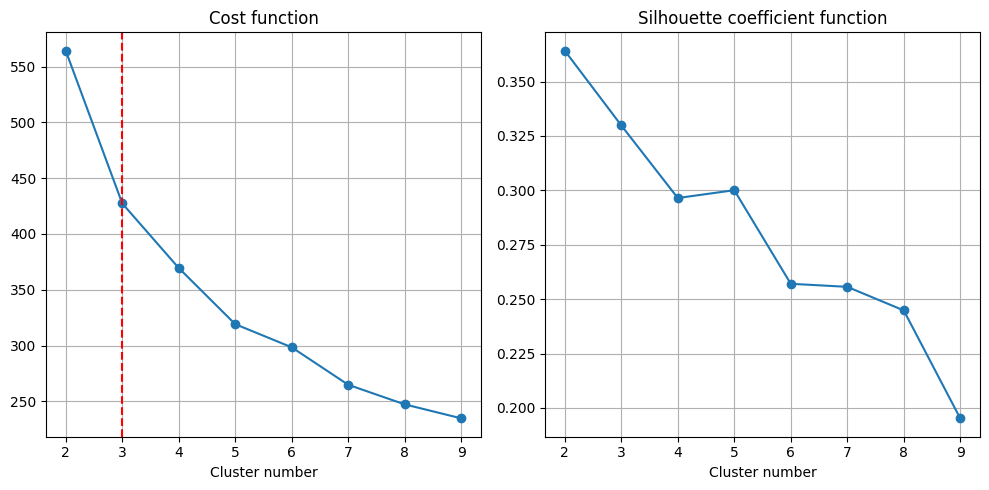

In [3]:
models = []
scores1 = []
scores2 = []
clustersRange = (2, 10)
scores1_derivative2 = np.diff(scores1, 2)
for i in range(*clustersRange):
    kmeans = KMeans(n_clusters=i, random_state=0,
                    init="k-means++", n_init=10).fit(df)
    models.append(kmeans)
    scores1.append(kmeans.inertia_)
    scores2.append(silhouette_score(df, kmeans.labels_))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].grid()
axs[0].set_title("Cost function")
axs[0].set_xlabel("Cluster number")
axs[0].plot(np.arange(*clustersRange), scores1, marker="o")
axs[0].axvline(x=3, color='r', linestyle='--')
axs[1].grid()
axs[1].set_title("Silhouette coefficient function")
axs[1].set_xlabel("Cluster number")
axs[1].plot(np.arange(*clustersRange), scores2, marker="o")
plt.tight_layout()
plt.show()

In [4]:
Best_K = 3


def makeFigure():
    fig = go.Figure(data=[go.Scatter3d(
        x=df[graphCols[0]],
        y=df[graphCols[1]],
        z=df[graphCols[2]],
        mode="markers",
        marker=dict(
            color=df["Cluster"],
            size=4,
            colorbar=dict(
                nticks=5,
            )))])
    fig.update_layout(
        scene=dict(
            yaxis_title=graphCols[1],
            zaxis_title=graphCols[2],
            xaxis_title=graphCols[0],
        ),
        width=750,
        height=750,
    )
    fig.show()
    df.drop(columns=["Cluster"], inplace=True)

In [5]:
kmeans = KMeans(n_clusters=Best_K, random_state=0, n_init=10).fit(df)
df["Cluster"] = kmeans.labels_
df["Cluster"].value_counts()
makeFigure()

3. Провести кластеризацию данных с помощью алгоритма иерархической кластеризации.


In [6]:
model = AgglomerativeClustering(Best_K, compute_distances=True)
clastering = model.fit(df)
df["Cluster"] = clastering.labels_
makeFigure()

4. Провести кластеризацию данных с помощью алгоритма DBSCAN.


In [7]:
model = DBSCAN(eps=1.2, min_samples=5).fit(df)
df["Cluster"] = model.labels_
makeFigure()